In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Define the "value" class, which essentially encodes data and label attributes. Each value object will basically be one node in the simple neural network.

In [3]:
class Value:
    def __init__(self, data, _children=(), _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f'Value(data={self.data})'
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

In [4]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b + c

In [5]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [6]:
d._op

'+'

In [7]:
from graphviz import Digraph

In [8]:
def trace(root):
    """Build set of all nodes and edges in a graph. Returns nodes, edges as sets"""
    nodes, edges = set(), set()
    
    def build(v):
        """Build function which checks to see which nodes have not yet been visited"""
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                #Recursively call build function on child nodes
                build(child) 
    #Call build function on root node            
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) #LR is left-to-right
    
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))

        #All values in the graph have a labelled node created for them
        dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record')

        #Check to see whether there is an operator involved in the creation of a new node
        if n._op:
            dot.node(name = uid + n._op, label = n._op)

            #Connect the nodes
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

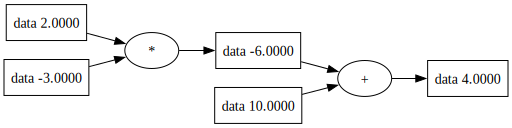

In [9]:
draw_dot(d)